In [ ]:
! curl -s "https://www.e-stat.go.jp/stat-search/file-download?statInfId=000031524010&fileKind=1" -o "人口.csv"
! pip install japanize_matplotlib

     |████████████████████████████████| 4.1 MB 5.0 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120274 sha256=571c53e88be00098174056c2e74a8a68cc07dc3f8a0637ef71f8bd2090aa51de
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, ward

In [ ]:
Todoufuken = "1 北海道\n\
              2 青森県\n\
              3 岩手県\n\
              4 宮城県\n\
              5 秋田県\n\
              6 山形県\n\
              7 福島県\n\
              8 茨城県\n\
              9 栃木県\n\
              10 群馬県\n\
              11 埼玉県\n\
              12 千葉県\n\
              13 東京都\n\
              14 神奈川県\n\
              15 新潟県\n\
              16 富山県\n\
              17 石川県\n\
              18 福井県\n\
              19 山梨県\n\
              20 長野県\n\
              21 岐阜県\n\
              22 静岡県\n\
              23 愛知県\n\
              24 三重県\n\
              25 滋賀県\n\
              26 京都府\n\
              27 大阪府\n\
              28 兵庫県\n\
              29 奈良県\n\
              30 和歌山県\n\
              31 鳥取県\n\
              32 島根県\n\
              33 岡山県\n\
              34 広島県\n\
              35 山口県\n\
              36 徳島県\n\
              37 香川県\n\
              38 愛媛県\n\
              39 高知県\n\
              40 福岡県\n\
              41 佐賀県\n\
              42 長崎県\n\
              43 熊本県\n\
              44 大分県\n\
              45 宮崎県\n\
              46 鹿児島県\n\
              47 沖縄県"
todoufuken_parser = {}
Todoufuken = Todoufuken.replace("\n", ",")
print(Todoufuken)
for i in range(len(Todoufuken)):
    if Todoufuken[i: i+2] == "  ":
        j = 1
        while Todoufuken[j + i] == " ":
            j += 1
        break
Todoufuken = Todoufuken.replace(" "*j, "")
print(Todoufuken)
Todoufuken = Todoufuken.split(",")
print(Todoufuken)
for s in Todoufuken:
    tmp = s.split(" ")
    todoufuken_parser[tmp[1]] = int(tmp[0])

1 北海道,              2 青森県,              3 岩手県,              4 宮城県,              5 秋田県,              6 山形県,              7 福島県,              8 茨城県,              9 栃木県,              10 群馬県,              11 埼玉県,              12 千葉県,              13 東京都,              14 神奈川県,              15 新潟県,              16 富山県,              17 石川県,              18 福井県,              19 山梨県,              20 長野県,              21 岐阜県,              22 静岡県,              23 愛知県,              24 三重県,              25 滋賀県,              26 京都府,              27 大阪府,              28 兵庫県,              29 奈良県,              30 和歌山県,              31 鳥取県,              32 島根県,              33 岡山県,              34 広島県,              35 山口県,              36 徳島県,              37 香川県,              38 愛媛県,              39 高知県,              40 福岡県,              41 佐賀県,              42 長崎県,              43 熊本県,              44 大分県,              45 宮崎県,              46 鹿児島県,              47 沖縄県
1 北海道,2 青森県,3 岩手県,4 宮城県,5 秋田県,6 山

In [ ]:
df = pd.read_csv("人口.csv", encoding="shift_jis")
df2 = pd.read_csv("面積.csv", encoding="shift_jis")
df.head()
df2.head()

,時間軸（年次） コード,時間軸（年次）,全国，都道府県，市区町村 コード,全国，都道府県，市区町村,/表章事項,2015年（平成27年）の人口（組替）【人】,世帯数【世帯】,2015年（平成27年）の世帯数（組替）【世帯】,5年間の人口増減数【人】,5年間の人口増減率【％】,5年間の世帯増減数【世帯】,5年間の世帯増減率【％】,人口性比,面積（参考）【km2】,人口密度【1km2当たり】
0,2020000000,2020年,0,全国,NaN,"127,094,745","55,719,562","53,448,685","-868,177",-0.68309,"2,270,877",4.24871,94.59422,"377,976.41",338.4
1,2020000000,2020年,1000,北海道,NaN,"5,381,733","2,471,140","2,444,810","-152,848",-2.84013,"26,330",1.07698,89.22583,"83,424.44",66.7
2,2020000000,2020年,1100,札幌市,NaN,"1,952,356","966,009","921,837","22,709",1.16316,"44,172",4.79174,86.97477,"1,121.26","1,761.5"
3,2020000000,2020年,1101,札幌市中央区,NaN,"237,627","140,898","132,006","11,213",4.71874,"8,892",6.73606,82.92486,46.42,"5,360.6"
4,2020000000,2020年,1102,札幌市北区,NaN,"285,321","139,019","133,662","4,346",1.52320,"5,357",4.00787,89.30504,63.57,"4,556.7"


In [ ]:
df_2015 = df[df["西暦（年）"] == 2015]
df_2015 = df_2015.set_index("都道府県名").loc["北海道":]

df2 = df2.rename(columns={"全国，都道府県，市区町村": "都道府県", "面積（参考）【km2】":"面積"})
df2 = df2.loc[:, ["都道府県", "面積"]]
df2 = df2[df2["都道府県"].isin(todoufuken_parser.keys())]
df2 = df2.set_index("都道府県").loc["北海道":]

In [ ]:
df_2015 = df_2015.join(df2)

In [ ]:
change = {}
for s in np.array(df_2015["面積"]):
    tmp = s
    s = s.replace(",", "")
    change[tmp] = float(s)

In [ ]:
df_2015 = df_2015.replace(change)

##都道府県の人口と面積でクラスタリングせよ

>結果をデンドログラムで出力すること

In [ ]:
df_2015.head()

,都道府県コード,元号,和暦（年）,西暦（年）,注,人口（総数）,人口（男）,人口（女）,面積
都道府県名,,,,,,,,,
北海道,01,平成,27.0,2015.0,NaN,5381733,2537089,2844644,83424.44
青森県,02,平成,27.0,2015.0,NaN,1308265,614694,693571,9645.64
岩手県,03,平成,27.0,2015.0,NaN,1279594,615584,664010,15275.01
宮城県,04,平成,27.0,2015.0,NaN,2333899,1140167,1193732,7282.29
秋田県,05,平成,27.0,2015.0,NaN,1023119,480336,542783,11637.52


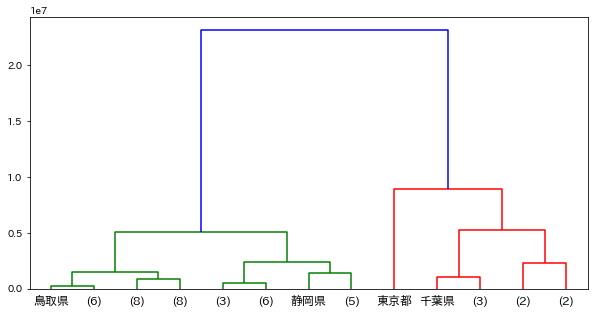

In [ ]:
#----------------------------------code----------------------------------#

#----------------------------------//code--------------------------------#

[1 1 4]
